# Buissness Problem

In [116]:
#import liberaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge,Lasso
import joblib


In [117]:
#to load the dataset
student=pd.read_csv('studentdata.csv')

In [118]:
student

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [119]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [120]:
student['study_hours'].isnull().sum()

5

In [121]:
student['student_marks'].isnull().sum()

0

In [122]:
student.shape

(200, 2)

In [123]:
student.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


In [124]:
meanvalues=student['study_hours'].mean()

In [125]:
meanvalues

6.9959487179487185

In [126]:
studentfilled=student.fillna(value=meanvalues)

In [127]:
studentfilled

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19
...,...,...
195,7.530000,81.67
196,8.560000,84.68
197,8.940000,86.75
198,6.600000,78.05


In [128]:
studentfilled

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19
...,...,...
195,7.530000,81.67
196,8.560000,84.68
197,8.940000,86.75
198,6.600000,78.05


In [129]:
studentfilled.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

# analysis

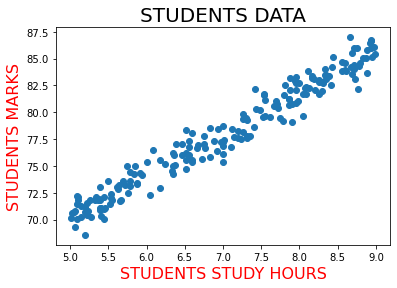

In [130]:
plt.scatter(x=studentfilled.study_hours,y=studentfilled.student_marks)
plt.xlabel('STUDENTS STUDY HOURS',color='red',fontsize=16)
plt.ylabel('STUDENTS MARKS',color='red',fontsize=16)
plt.title('STUDENTS DATA',color='black',fontsize=20)
plt.show()

In [131]:
relation=studentfilled.corr()

In [132]:
relation

,study_hours,student_marks
study_hours,1.000000,0.978696
student_marks,0.978696,1.000000


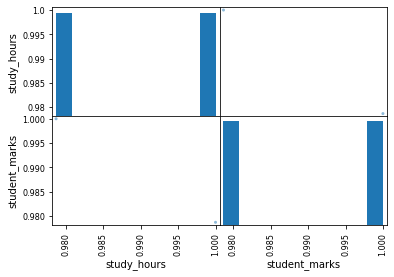

In [135]:
scatter_matrix(relation)
plt.show()

In [16]:
#frm this we can visviluaize rhat our data is lineaR

In [17]:
#X=studentfilled['study_hours']
#y=studentfilled['student_marks']''''''

In [18]:
X

0      6.830000
1      6.560000
2      6.995949
3      5.670000
4      8.670000
         ...   
195    7.530000
196    8.560000
197    8.940000
198    6.600000
199    8.350000
Name: study_hours, Length: 200, dtype: float64

In [49]:
X=studentfilled.drop('student_marks',axis=1)
y=studentfilled.drop('study_hours',axis=1)

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=51)

In [51]:
X_train.shape

(160, 1)

In [52]:
X_test.shape

(40, 1)

In [53]:
y_train.shape

(160, 1)

In [54]:
y_test.shape

(40, 1)

# linear model

In [55]:
#creating the object for that 
lr=LinearRegression()

In [56]:
lr.fit(X_train,y_train)

LinearRegression()

In [57]:
lr.coef_

array([[3.93571802]])

In [58]:
lr.intercept_

array([50.44735504])

# testing

In [59]:
X_test

,study_hours
148,8.300000
104,7.230000
4,8.670000
7,8.990000
192,8.710000
160,7.700000
118,5.690000
58,5.390000
190,5.790000
174,5.390000


In [60]:
y_test

,student_marks
148,82.02
104,77.55
4,84.19
7,85.46
192,84.03
160,80.81
118,73.61
58,70.90
190,73.14
174,73.02


In [61]:
predictions=lr.predict(X_test)

In [62]:
predictions

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [63]:
lr.score(X_test,y_test)#as this is keen to be sccurate 

0.9514124242154464

In [64]:
#but we can still try for the lasso and ridge in order to increase the accuracy


In [86]:
mse=mean_squared_error(y_test,predictions)

In [87]:
rmse=np.sqrt(mse)

In [88]:
rmse

1.0526176617137155

# checking for ridge and lasso 

In [65]:
rd=Ridge()

In [66]:
rd.fit(X_train,y_train)

Ridge()

In [67]:
predict=rd.predict(X_test)

In [68]:
predict

array([[83.09296701],
       [78.89909753],
       [84.54318355],
       [85.79742489],
       [84.69996372],
       [80.7412645 ],
       [72.86306109],
       [71.68720984],
       [73.25501151],
       [71.68720984],
       [73.49018176],
       [76.39061486],
       [73.25501151],
       [73.60776689],
       [82.93618684],
       [70.4329685 ],
       [73.25501151],
       [78.74231737],
       [75.56751898],
       [82.66182155],
       [76.66498015],
       [70.51135859],
       [74.78361814],
       [77.98173255],
       [85.56225464],
       [82.54423642],
       [76.4298099 ],
       [85.01352406],
       [78.38956199],
       [81.36838517],
       [81.72114054],
       [83.13216205],
       [82.19148105],
       [81.09401988],
       [73.60776689],
       [71.1776743 ],
       [71.92238009],
       [81.52516534],
       [72.62789084],
       [71.96157513]])

In [69]:
rd.score(X_test,y_test)#it is almost same

0.9518132972505242

In [89]:
mse=mean_squared_error(y_test,predict)

In [90]:
rmse=np.sqrt(mse)

In [91]:
rmse

1.0482663435065531

In [70]:
ls=Lasso()

In [71]:
ls.fit(X_train,y_train)

Lasso()

In [72]:
pre=ls.predict(X_test)

In [92]:
pre

array([82.26278581, 78.75977155, 83.47410851, 84.52173894, 83.60506231,
       80.29847875, 73.71805008, 72.73589655, 74.04543459, 72.73589655,
       74.2418653 , 76.66451068, 74.04543459, 74.34008065, 82.13183201,
       71.68826611, 74.04543459, 78.62881774, 75.97700321, 81.90266285,
       76.89367984, 71.75374302, 75.32223418, 77.9935239 , 84.32530823,
       81.8044475 , 76.69724913, 83.86696992, 78.33417168, 80.82229397,
       81.11694003, 82.29552427, 81.50980144, 80.59312481, 74.34008065,
       72.31029668, 72.93232726, 80.95324777, 73.52161937, 72.96506571])

In [95]:
ls.score(X_test,y_test)

0.9382901022367997

In [96]:
mse=mean_squared_error(y_test,pre)

In [97]:
rmse=np.sqrt(mse)

In [98]:
rmse

1.1862751983782909

In [75]:
y_test

,student_marks
148,82.02
104,77.55
4,84.19
7,85.46
192,84.03
160,80.81
118,73.61
58,70.90
190,73.14
174,73.02


In [76]:
#so most accurate is linear itself

In [99]:
combineddata=pd.DataFrame(np.c_[X_test,y_test,predictions],columns=['study_hours','originaldata','predicteddata'])

In [100]:
combineddata

,study_hours,originaldata,predicteddata
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


In [101]:
#how our data is so accurate

# saving  theMODEL

In [108]:
#save ml model import the liberary joblib
joblib.dump(rd,'STUDENT_MARK_PREDICTER.pkl')

['STUDENT_MARK_PREDICTER.pkl']

In [109]:
#to call this model 

In [110]:
model=joblib.load("STUDENT_MARK_PREDICTER.pkl")

In [111]:
model

Ridge()

In [112]:
model.predict([[5]])

array([[70.15860321]])

In [113]:
#it means it is wokding properly 